<a href="https://colab.research.google.com/github/seismosmsr/machine_learning/blob/main/bison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")
install.packages("terra")
install.packages('randomForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the

In [2]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(terra)
library(randomForest)
library(parallel)

Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE

Loading required package: sp

terra 1.7.65


Attaching package: ‘terra’


The following object is masked from ‘package:data.table’:

    shift


The following objects are masked from ‘package:magrittr’:

    extract, inset


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=f75b7ceb10741ca06d8e1a2aee749565&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbXZrd29OLUY1aXZQSWQ2aVlYd0R3Rl9HYWZ1OFBLQkNqUHVXYVZnSDg3Vkk3ZVQ1dHg0SDRMalB2aXdLT2VzdyIsInN0YXRlIjoiZjc1YjdjZWIxMDc0MWNhMDZkOGUxYTJhZWU3NDk1NjUifQ==


In [118]:
# https://drive.google.com/file/d/1mEBvv_50i5nkrIOsj-ibYAaKEO7EJDvq/view?usp=drive_link
drive_download(file = as_id('1mEBvv_50i5nkrIOsj-ibYAaKEO7EJDvq'), path =  '/content/Combined_NDVI_January.tif', overwrite = FALSE)
ndvi_january_tif <- stack('/content/Combined_NDVI_January.tif')

In [119]:
# https://drive.google.com/file/d/1K4yv6emVCW6GtefFRC_Z2kgIaywDcUIy/view?usp=drive_link
drive_download(file = as_id('1K4yv6emVCW6GtefFRC_Z2kgIaywDcUIy'), path =  '/content/Combined_NDVI_February.tif', overwrite = FALSE)
ndvi_february_tif <- stack('/content/Combined_NDVI_February.tif')

In [4]:
# https://drive.google.com/file/d/1EB8afavWVOQ8qurB2AXEbKUXlVyAP9hy/view?usp=drive_link
drive_download(file = as_id('1EB8afavWVOQ8qurB2AXEbKUXlVyAP9hy'), path =  '/content/Combined_NDVI_March.tif', overwrite = FALSE)
ndvi_march_tif <- stack('/content/Combined_NDVI_March.tif')

File downloaded:

• Combined_NDVI_March.tif <id: 1EB8afavWVOQ8qurB2AXEbKUXlVyAP9hy>

Saved locally as:

• /content/Combined_NDVI_March.tif



In [120]:
# https://drive.google.com/file/d/1XUrBVSWPOIpfGFb7O-NFLUTaFr_c_-MU/view?usp=drive_link
drive_download(file = as_id('1XUrBVSWPOIpfGFb7O-NFLUTaFr_c_-MU'), path =  '/content/Combined_NDVI_April.tif', overwrite = FALSE)
ndvi_april_tif <- stack('/content/Combined_NDVI_April.tif')

In [6]:
# https://drive.google.com/file/d/1HvMK9NhoI90b5OGmxXhFebiXrnV5ZMNZ/view?usp=drive_link
drive_download(file = as_id('1HvMK9NhoI90b5OGmxXhFebiXrnV5ZMNZ'), path =  '/content/Combined_NDVI_May.tif', overwrite = FALSE)
ndvi_may_tif <- stack('/content/Combined_NDVI_May.tif')

File downloaded:

• Combined_NDVI_May.tif <id: 1HvMK9NhoI90b5OGmxXhFebiXrnV5ZMNZ>

Saved locally as:

• /content/Combined_NDVI_May.tif



In [7]:
# https://drive.google.com/file/d/1LHQG7MN4p9Dpfa-lHc3HeyqL8Pm9MM2H/view?usp=drive_link
drive_download(file = as_id('1LHQG7MN4p9Dpfa-lHc3HeyqL8Pm9MM2H'), path =  '/content/Combined_NDVI_June.tif', overwrite = FALSE)
ndvi_june_tif <- stack('/content/Combined_NDVI_June.tif')

File downloaded:

• Combined_NDVI_June.tif <id: 1LHQG7MN4p9Dpfa-lHc3HeyqL8Pm9MM2H>

Saved locally as:

• /content/Combined_NDVI_June.tif



In [8]:
# https://drive.google.com/file/d/11cCdrfUYjVefu-bXnJovoWK1Zngk5KtG/view?usp=drive_link
drive_download(file = as_id('11cCdrfUYjVefu-bXnJovoWK1Zngk5KtG'), path =  '/content/Combined_NDVI_July.tif', overwrite = FALSE)
ndvi_july_tif <- stack('/content/Combined_NDVI_July.tif')

File downloaded:

• Combined_NDVI_July.tif <id: 11cCdrfUYjVefu-bXnJovoWK1Zngk5KtG>

Saved locally as:

• /content/Combined_NDVI_July.tif



In [9]:
# https://drive.google.com/file/d/1Y9gjzR9urYd1wXcY_6kUTN2aLbG8AgZO/view?usp=drive_link
drive_download(file = as_id('1Y9gjzR9urYd1wXcY_6kUTN2aLbG8AgZO'), path =  '/content/Combined_NDVI_August.tif', overwrite = FALSE)
ndvi_august_tif <- stack('/content/Combined_NDVI_August.tif')

File downloaded:

• Combined_NDVI_August.tif <id: 1Y9gjzR9urYd1wXcY_6kUTN2aLbG8AgZO>

Saved locally as:

• /content/Combined_NDVI_August.tif



In [10]:
# https://drive.google.com/file/d/1zH5p-3QTraWOKe1grjabbGaMRUbRiX2S/view?usp=drive_link
drive_download(file = as_id('1zH5p-3QTraWOKe1grjabbGaMRUbRiX2S'), path =  '/content/Combined_NDVI_September.tif', overwrite = FALSE)
ndvi_september_tif <- stack('/content/Combined_NDVI_September.tif')

File downloaded:

• Combined_NDVI_September.tif <id: 1zH5p-3QTraWOKe1grjabbGaMRUbRiX2S>

Saved locally as:

• /content/Combined_NDVI_September.tif



In [11]:
# https://drive.google.com/file/d/17aAdF6beiYgheaYjDf-MkhcDoI92LVs2/view?usp=drive_link
drive_download(file = as_id('17aAdF6beiYgheaYjDf-MkhcDoI92LVs2'), path =  '/content/Combined_NDVI_October.tif', overwrite = FALSE)
ndvi_october_tif <- stack('/content/Combined_NDVI_October.tif')

File downloaded:

• Combined_NDVI_October.tif <id: 17aAdF6beiYgheaYjDf-MkhcDoI92LVs2>

Saved locally as:

• /content/Combined_NDVI_October.tif



In [124]:
# https://drive.google.com/file/d/1_MDDq8xpD2gR3dt_QMXkn7LL7FMDBWZM/view?usp=drive_link
drive_download(file = as_id('1_MDDq8xpD2gR3dt_QMXkn7LL7FMDBWZM'), path =  '/content/Combined_NDVI_November.tif', overwrite = FALSE)
ndvi_november_tif <- stack('/content/Combined_NDVI_November.tif')

In [123]:
# https://drive.google.com/file/d/1BlqyfQPC87eNCKL-JuTfNNG7uzoiwQfo/view?usp=drive_link
drive_download(file = as_id('1BlqyfQPC87eNCKL-JuTfNNG7uzoiwQfo'), path =  '/content/Combined_NDVI_December.tif', overwrite = FALSE)
ndvi_december_tif <- stack('/content/Combined_NDVI_December.tif')

In [15]:
# https://drive.google.com/file/d/1-cViXhcOwyD5q90LOHX09-Mc2gsoLiE9/view?usp=drive_link
drive_download(file = as_id('1-cViXhcOwyD5q90LOHX09-Mc2gsoLiE9'), path =  '/content/non_overlapping_mu.gpkg', overwrite = FALSE)
non_overlapping_mu_gpgk <- st_read('/content/non_overlapping_mu.gpkg')

File downloaded:

• non_overlapping_mu.gpkg <id: 1-cViXhcOwyD5q90LOHX09-Mc2gsoLiE9>

Saved locally as:

• /content/non_overlapping_mu.gpkg



Reading layer `sub' from data source `/content/non_overlapping_mu.gpkg' using driver `GPKG'
Simple feature collection with 20 features and 11 fields
Geometry type: POLYGON
Dimension:     XYZ
Bounding box:  xmin: -109.2711 ymin: 43.01131 xmax: -108.1557 ymax: 43.71033
z_range:       zmin: 0 zmax: 2211.875
Geodetic CRS:  WGS 84


In [19]:
# raster_list <- list.files('/content/predictor_variables',pattern = '*.vrt',full.names = T,recursive = T) %>% lapply(stack) %>% lapply(rast)
ndvi_march_rast <- ndvi_march_tif %>% rast

In [25]:
ndvi_dt <- exact_extract(ndvi_march_rast,non_overlapping_mu_gpgk,fun='mean')

Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


In [170]:
raster_list <- list(
  ndvi_january_tif,
  ndvi_february_tif,
  ndvi_march_tif,
  ndvi_april_tif,
  ndvi_june_tif,
  ndvi_july_tif,
  ndvi_august_tif,
  ndvi_september_tif,
  ndvi_october_tif,
  ndvi_november_tif,
  ndvi_december_tif)

In [171]:
names(raster_list) <- c('January','February','March','April','June','July','August','September', 'October','November','December')

In [172]:
# non_overlapping_mu_gpgk

In [173]:
ndvi_mean_dt <-
raster_list %>%
  names %>%
  lapply(function(ndvi_names){


ndvi_rast <-raster_list[[ndvi_names]] %>% rast

ndvi_dt <- exact_extract(ndvi_rast,non_overlapping_mu_gpgk,fun='mean')
# ndvi_dt$names
ndvi_table <-
ndvi_dt %>%
  names %>%
  lapply(function(x){
    data.table(column = x,NDVI_mean = ndvi_dt[[x]],Name = non_overlapping_mu_gpgk$Name)
  }) %>%
rbindlist()

ndvi_dt <- exact_extract(ndvi_rast,non_overlapping_mu_gpgk,fun='stdev')
# ndvi_dt$names
ndvi_sd_table <-
ndvi_dt %>%
  names %>%
  lapply(function(x){
    data.table(column = x,NDVI_sd = ndvi_dt[[x]],Name = non_overlapping_mu_gpgk$Name)
  }) %>%
rbindlist()

ndvi_table$month <- ndvi_names
ndvi_table$NDVI_sd <- ndvi_sd_table$NDVI_sd
return(ndvi_table)
  }) %>%
    rbindlist()

Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 440475300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


In [174]:
ndvi_mean_dt[,year:=column %>% strsplit(.,'_') %>% lapply(function(x){x[[2]]}) %>% lapply(as.numeric)]
ndvi_mean_dt[,month:=month %>% factor(., levels= c('January','February','March','April','June','July','August','September', 'October','November','December'))]
ndvi_mean_dt[,month_i:=(month %>% as.numeric)]

In [269]:
ndvi_mean_dt[,year_introduced := 0]
ndvi_mean_dt[Name=='Shoshone Tribe',year_introduced := 2015]
ndvi_mean_dt[Name== 'Buffalo Initiative',year_introduced := 2018]
ndvi_mean_dt[Name== 'T3000, Unassigned Leases',year_introduced := 2018]
ndvi_mean_dt[Name== 'Buffalo Initiative',year_introduced := 2020]

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 3017 rows containing non-finite values (`stat_smooth()`).”


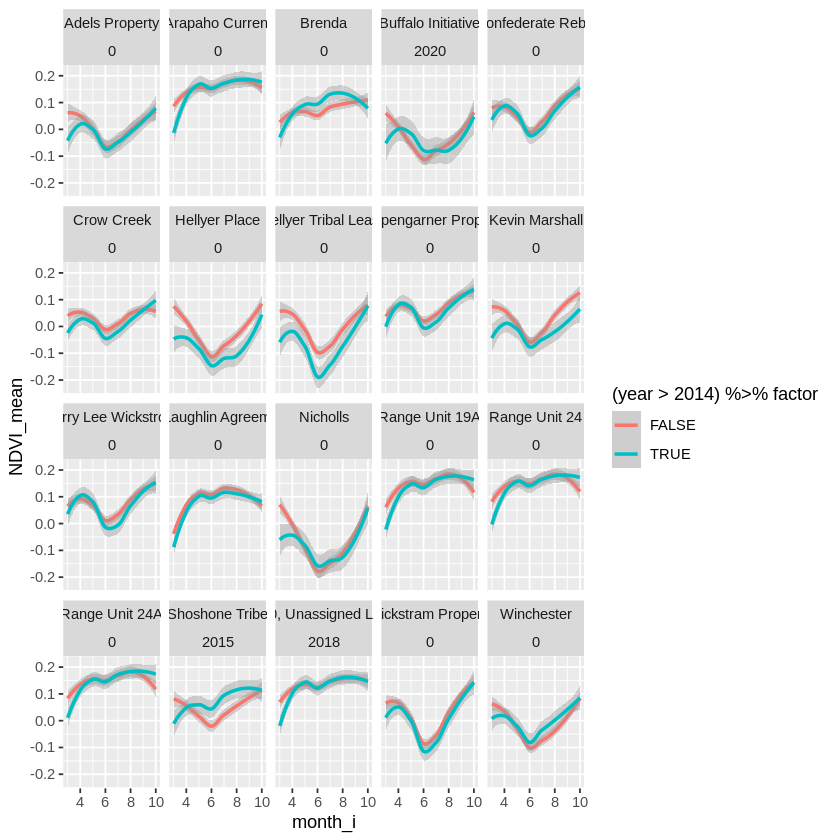

In [274]:
ndvi_mean_dt[] %>%
  ggplot(aes(x=month_i,y=NDVI_mean))+
  # geom_point(aes(group=year %>% paste,color=year %>% as.numeric)) +
  xlim(3,10)+
  geom_smooth(aes(color=(year > 2014) %>% factor ))+
  facet_wrap(Name~year_introduced)

In [255]:
ndvi_mean_dt <- ndvi_mean_dt[order(month_i)]
ndvi_mean_dt[,accum_ndvi :=NULL]
ndvi_mean_dt[month_i>4&month_i<10,  accum_ndvi := cumsum(NDVI_mean), by= .(Name,year %>% paste)]
ndvi_mean_dt[,list(accum_ndvi=mean(accum_ndvi,na.rm=T)),by = .(month,year %>% paste,Name)][!is.na(accum_ndvi)]

month,year,Name,accum_ndvi
<fct>,<chr>,<chr>,<dbl>
June,1984,Shoshone Tribe,-0.096746616
June,1984,Buffalo Initiative,-0.065341592
June,1984,Hellyer Place,-0.159845501
June,1984,Adels Property,-0.117270477
June,1984,Hoopengarner Property,0.049100380
June,1984,Wickstram Property,0.018846745
June,1984,Hellyer Tribal Lease,-0.077235237
June,1984,Nicholls,-0.103464030
June,1984,"T3000, Unassigned Leases",0.112668790


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 256 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 256 rows containing missing values (`geom_line()`).”


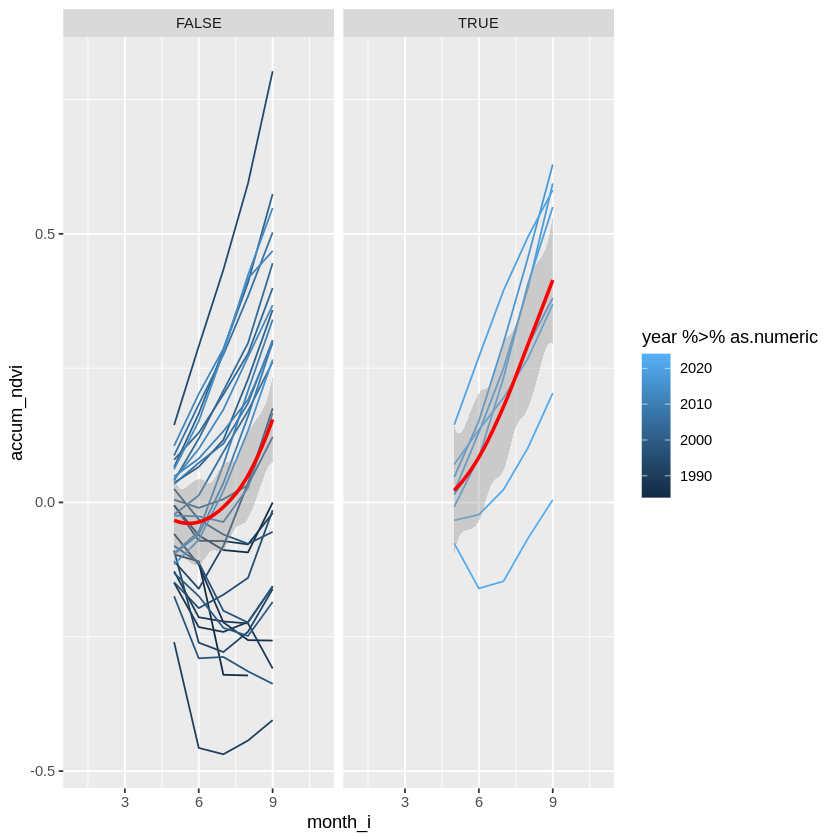

In [245]:
ndvi_mean_dt[ Name=='Shoshone Tribe' ] %>%
  ggplot(aes(x=month_i,y=accum_ndvi))+
  geom_line(aes(group=year %>% paste,color=year %>% as.numeric)) +
  geom_smooth(color='red')+
  facet_wrap(~year > 2015)